# Word2vec on Amazon review corpus 

Word2vec is a very popular Natural Language Processing technique nowadays that uses a neural network to learn the vector representations of words called “word embeddings” in a particular text.

In this tutorial, we will use the excellent implementation of word2vec from the gensimpackage to build our word2vec model.

### Data Presentation

We will use the Amazon review corpus on Health and Personal Care. The dataset is in json format and contains 346,355 reviews.

First we need to combine all the reviews text of the dataset into one string. For that, we will first use Pandas to load the dataset. We can do so with the following code.

In [7]:
import pandas as pd
# load the data into panda dataframe
data_file_name = "data/reviews_Health_and_Personal_Care_5.json"
raw_df = pd.read_json(data_file_name, lines=True)
print("Data loaded")
raw_df.head()

Data loaded


,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,159985130X,"[1, 1]",5,This is a great little gadget to have around. ...,"01 5, 2011",ALC5GH8CAMAI7,AnnN,Handy little gadget,1294185600
1,159985130X,"[1, 1]",4,I would recommend this for a travel magnifier ...,"02 18, 2012",AHKSURW85PJUE,"AZ buyer ""AZ buyer""",Small & may need to encourage battery,1329523200
2,159985130X,"[75, 77]",4,What I liked was the quality of the lens and t...,"06 8, 2010",A38RMU1Y5TDP9,"Bob Tobias ""Robert Tobias""",Very good but not great,1275955200
3,159985130X,"[56, 60]",4,Love the Great point light pocket magnifier! ...,"02 8, 2008",A1XZUG7DFXXOS4,Cat lover,great addition to your purse,1202428800
4,159985130X,"[1, 1]",5,This is very nice. You pull out on the magnifi...,"08 16, 2011",A1MS3M7M7AM13X,Cricketoes,Very nice and convenient.,1313452800


We see that the DataFrame has many columns but we are only interested in the column that contains the review text. That column name is reviewText. We will use Python join method on that column to combine all the reviews text in one string.

In [10]:
# Convert all the review text into a long string and print its length
raw_corpus = u"".join(raw_df['reviewText']+" ")
print("Raw Corpus contains {0:,} characters".format(len(raw_corpus)))

Raw Corpus contains 178,581,273 characters


## Tokenization into sentences

gensim’s word2vec expects a sequence of sentences as its input, each one as a list of words. We then need to split the string that we obtain in the above section into sentences. For that, we will use NLTK‘s punkt tokenizer for sentence splitting. In order to use this, we will need to install NLTK and download the relevant training file for punkt. The following code help to download.

In [13]:
# import natural language toolkit
import nltk
# download the punkt tokenizer
nltk.download('punkt')
print("The punkt tokenizer is downloaded")
 
# Load the punkt tokenizer
tokenizer = nltk.data.load("tokenizers/punkt/english.pickle")
print("The punkt tokenizer is loaded")

[nltk_data] Downloading package punkt to /Users/couali/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
The punkt tokenizer is downloaded
The punkt tokenizer is loaded


We will now load the punkt tokenizer and use it to split our very long string into sentences.

In [15]:
# Load the punkt tokenizer
tokenizer = nltk.data.load("tokenizers/punkt/english.pickle")
print("The punkt tokenizer is loaded")
# we tokenize the raw string into raw sentences
raw_sentences = tokenizer.tokenize(raw_corpus)
print("We have {0:,} raw sentences".format(len(raw_sentences)))

The punkt tokenizer is loaded
We have 1,824,643 raw sentences


After tokenization, we see that our dataset contains 1,824,643 sentences.

## Clean and split sentence into words

We now need to clean the sentences we get after tokenization. The cleaning consists to removes punctuation, parentheses, question marks, etc., and leaves only alphabetic character. Also gensim’s word2vec expects each sentence to be a list of words. So we need to convert each clean sentence to a list of words.

In [16]:
import re
# Clean and split sentence into words
def clean_and_split_str(string):
    strip_special_chars = re.compile("[^A-Za-z]+")
    string = re.sub(strip_special_chars, " ", string)
    return string.strip().split()
     
# clean each raw sentences and build the list of sentences
sentences = []
for raw_sent in raw_sentences:
    if len(raw_sent) > 0:
        sentences.append(clean_and_split_str(raw_sent))
print("We have {0:,} clean sentences".format(len(sentences)))

We have 1,824,643 clean sentences


The following code help to count the number of token present in our dataset.

In [17]:
token_count = sum([len(sentence) for sentence in sentences])
print("The dataset corpus contains {0:,} tokens".format(token_count))

The dataset corpus contains 33,476,197 tokens


## Setting the numerical parameters

Gensim’s Word2Vec API accepts several parameters that affect both training speed and quality. The important parameters are:

* size :It is the dimensionality of the resulting word vectors
* min_count : It is the minimum word count threshold. In order words, we ignore all words with total frequency lower than this.
* workers : It is the number of threads to run in parallel.
* window : It is the maximum distance between the current and predicted word within a sentence.
* seed : it is for the RNG, to make the result reproducible.

The following code shows the value of the parameters of our model:

In [19]:
import multiprocessing
 
#Dimensionality of the resulting word vectors
num_features = 300
 
#Minimum word count threshold
min_word_count = 3
 
#Number of threads to run in parallel
num_workers = multiprocessing.cpu_count()
 
#Context window length
context_size = 7
 
#Seed for the RNG, to make the result reproducible
seed = 1

## Train our Word2Vec

We will now use the parameters above to initialize our word2vec model. After the initialisation, we will fisrt build the vocabulary of our dataset. After that, we will train our word2vec model.

In [28]:
import gensim
 
word2vec_model = gensim.models.word2vec.Word2Vec(
    sg=1,
    seed=seed,
    workers=num_workers, 
    size=num_features, 
    min_count=min_word_count, 
    window=context_size)
     
word2vec_model.build_vocab(sentences=sentences)
print("The vocabulary is built")
print("Word2Vec vocabulary length: ", len(word2vec_model.wv.vocab))
 
#Start training the model
print('model is tranining!')
word2vec_model.train(sentences=sentences, total_examples=word2vec_model.corpus_count, epochs=4)
print("Training finished")

The vocabulary is built
Word2Vec vocabulary length:  62972
Training finished


## Storing and loading

After training our model, we will now save it for future use.

In [30]:
#Save the model
word2vec_model.save("data/trained_word2vec_model.w2v")
print("Model saved")

Model saved


We can load our model with the following code.

In [31]:
# Load our word2vec model
import gensim
w2v_model = gensim.models.word2vec.Word2Vec.load("data/trained_word2vec_model.w2v")
print("Model loaded")

Model loaded


## Model visualization

After the training, we can visualize the learned embeddings using t-SNE. t-SNE is a tool for data visualization that reduces the dimensionality of data to 2 or 3 dimensions so that it can be plotted easily. Because the space complexity of the t-SNE algorithm is quadratic, in this tutorial we will view only a part of our model. We use the following code to select 10,000 words from our vocabulary.

In [34]:
import numpy as np
count = 10000
word_vectors_matrix = np.ndarray(shape=(count, 300), dtype='float64')
word_list = []
i = 0
for word in w2v_model.wv.vocab:
    word_vectors_matrix[i] = w2v_model[word]
    word_list.append(word)
    i = i+1
    if i == count:
        break
print("word_vectors_matrix shape is ", word_vectors_matrix.shape)

word_vectors_matrix shape is  (10000, 300)


/anaconda3/envs/yourika-env/lib/python3.6/site-packages/ipykernel/__main__.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


We will now initialize model and compress our word vectors into 2D space.

#Compress the word vectors into 2D space
import sklearn.manifold
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)
word_vectors_matrix_2d = tsne.fit_transform(word_vectors_matrix)
print("word_vectors_matrix_2d shape is ", word_vectors_matrix_2d.shape)

We build a Pandas Dataframe that contains the selected words and the x and y coordinates of each word.

In [37]:
points = pd.DataFrame(
    [
        (word, coords[0], coords[1]) 
        for word, coords in [
            (word, word_vectors_matrix_2d[word_list.index(word)])
            for word in word_list
        ]
    ],
    columns=["word", "x", "y"]
)
print("Points DataFrame built")
points.head(10)

Points DataFrame built


,word,x,y
0,This,-21.956875,16.719044
1,is,-18.671488,18.436300
2,a,-29.040474,6.826852
3,great,-36.354980,10.295007
4,little,-26.608097,46.766830
5,gadget,-16.768209,31.502113
6,to,-16.521944,15.514656
7,have,-38.761711,21.761284
8,around,1.693841,27.103331
9,We,9.012140,-3.955176


We can then use the Points DataFrame to plot our words vectors.

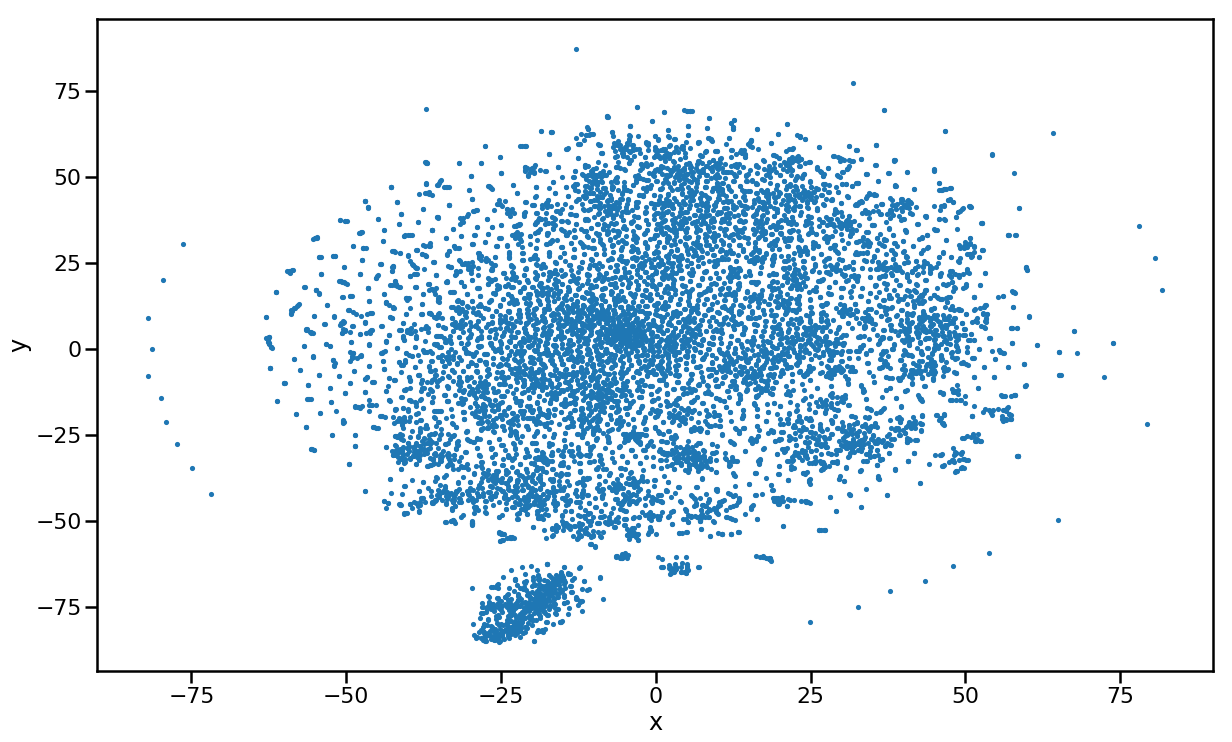

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context("poster")
points.plot.scatter("x", "y", s=10, figsize=(20, 12))

We will zoom in to some region in order to see the similarity of the words. We create a function that create a bounding box of x and y coordinates and plot only the words between that bounding box.

In [53]:
def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) &
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1]) 
    ]
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

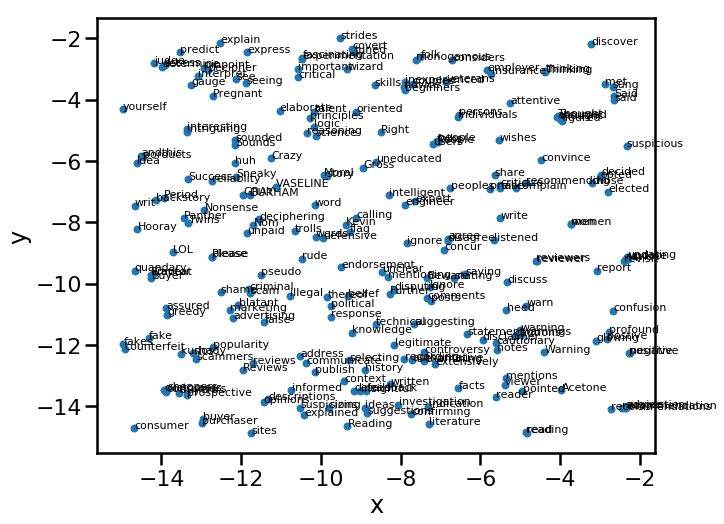

In [67]:
plot_region(x_bounds=(-15.0, -2.0), y_bounds=(-15.05, -2.0))

As expected, words that are similar end up clustering nearby each other.

## Most similar words

One way to check if we have a good word2vec model is to use the model to find the most similar words to a specific word. For that, we can use the most_similarfunction that returns the 10 most similar words to the given word. Let’s find the most similar words to the word blue.

In [58]:
w2v_model.most_similar("blue")

/anaconda3/envs/yourika-env/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':
/anaconda3/envs/yourika-env/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('purple', 0.7009928226470947),
 ('teal', 0.6857337951660156),
 ('turquoise', 0.672621488571167),
 ('pink', 0.6598712801933289),
 ('magenta', 0.6471105217933655),
 ('burgundy', 0.6340728998184204),
 ('colored', 0.6327191591262817),
 ('yellow', 0.6311765909194946),
 ('indigo', 0.6310799717903137),
 ('cobalt', 0.6310044527053833)]